## **CENSUS DATASET UPLOADING:-**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving census-income  (1).csv to census-income  (1).csv


## **IMPORTING REQUIRED DATASETS:-**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

## **DATASET INFO:-**

In [3]:
df=pd.read_csv('census-income  (1).csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## **EDA OPERATIONS:-**

In [5]:
df[(df['workclass']=='?') | (df['occupation']=='?') | (df['native-country']=='?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


## SO WE NEED TO DEAL WITH : '?'

In [6]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

In [7]:
df[(df['workclass']=='?') | (df['occupation']=='?') | (df['native-country']=='?')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income


In [8]:
# checking for null values:-
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [9]:
df['workclass']=df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation']=df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country']=df['native-country'].fillna(df['native-country'].mode()[0])

In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
# checking for duplicate values:-
df.duplicated().sum()

np.int64(24)

In [12]:
df.drop_duplicates(inplace=True)

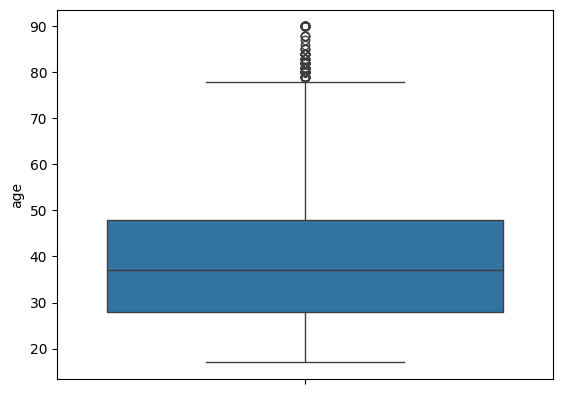

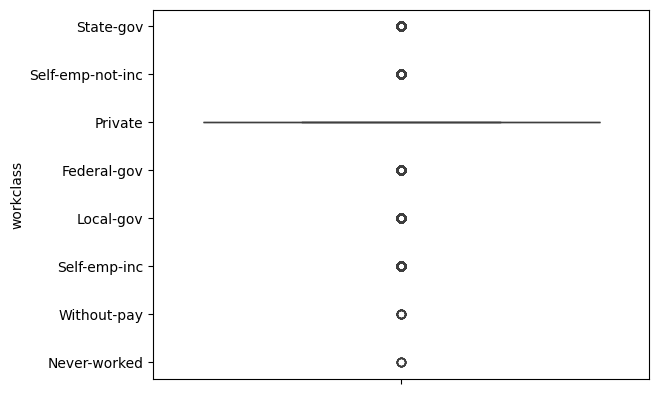

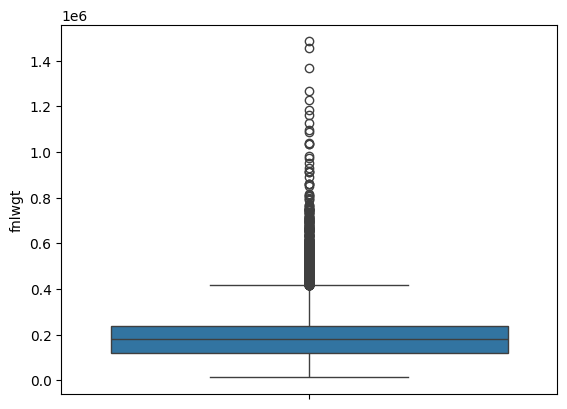

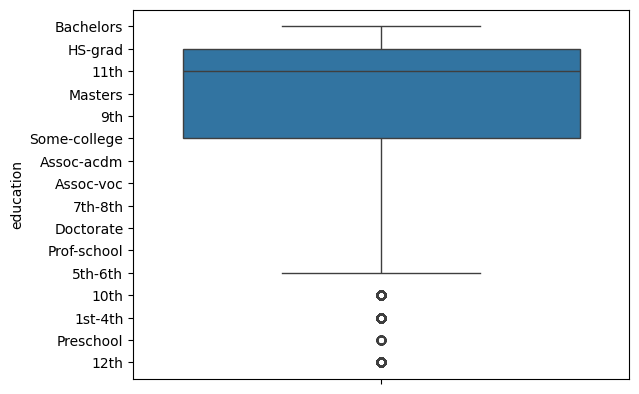

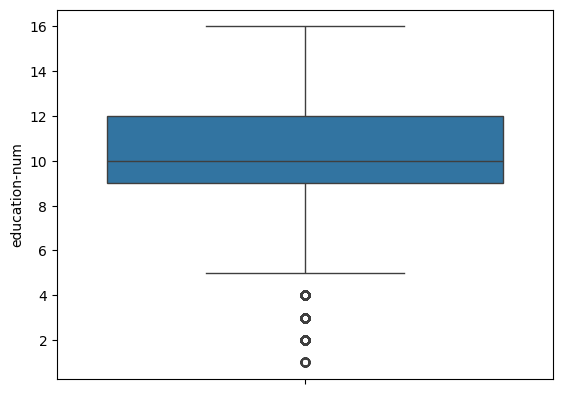

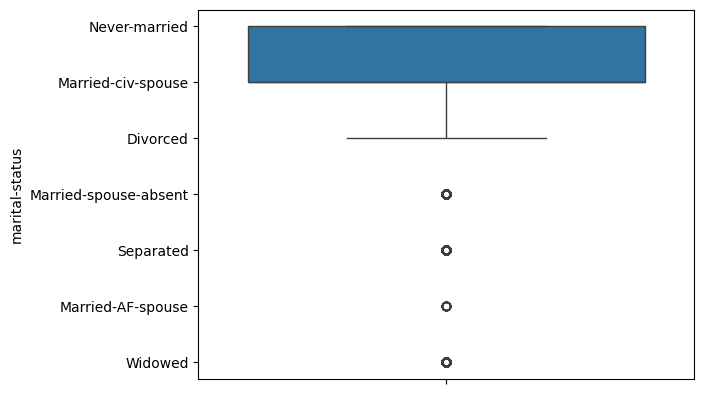

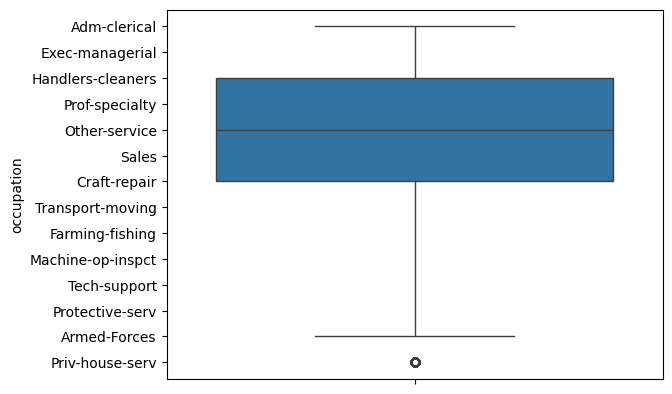

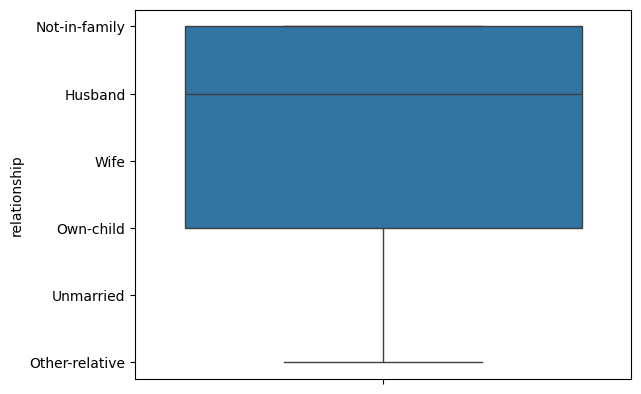

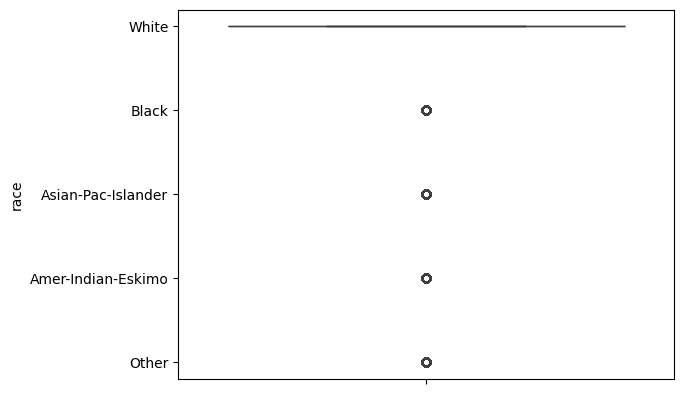

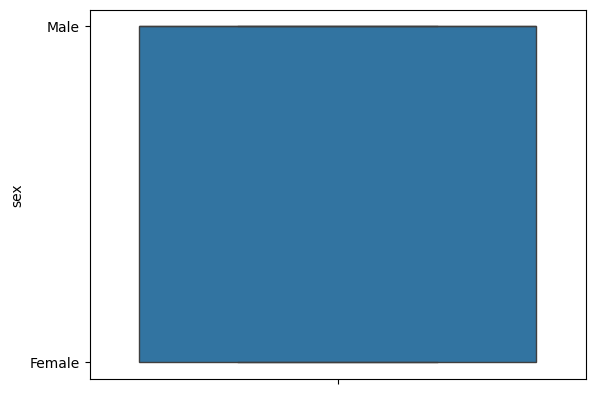

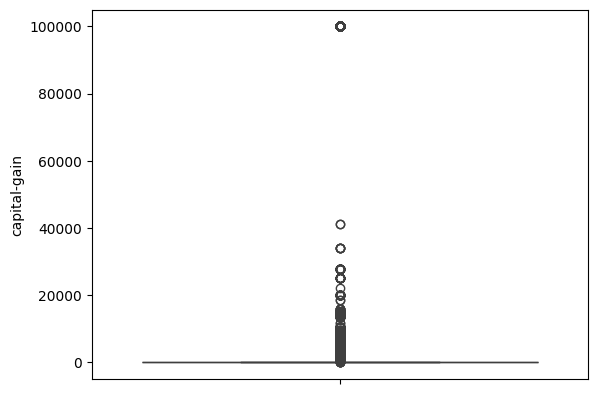

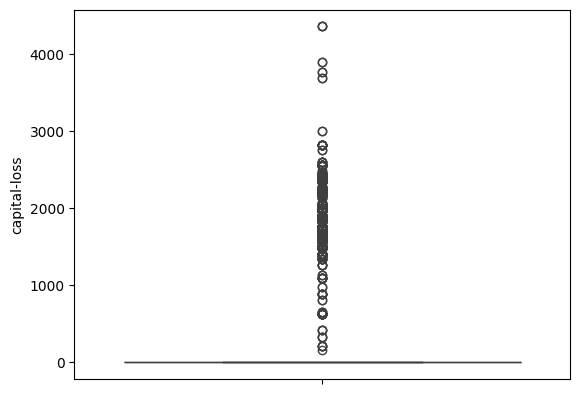

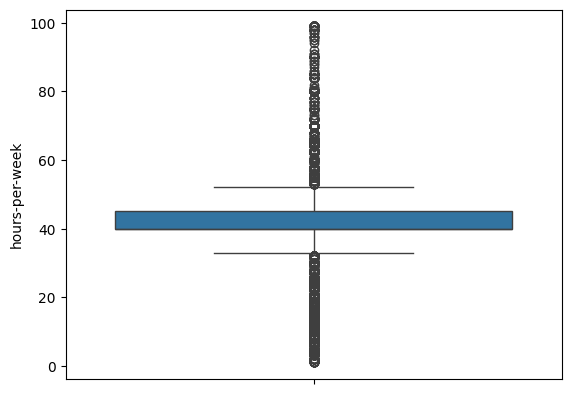

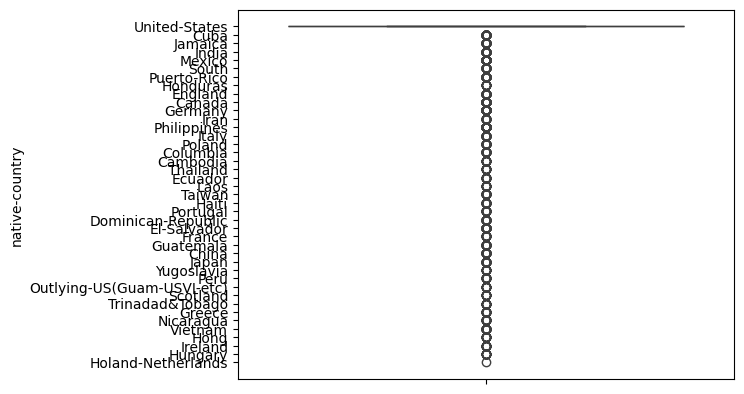

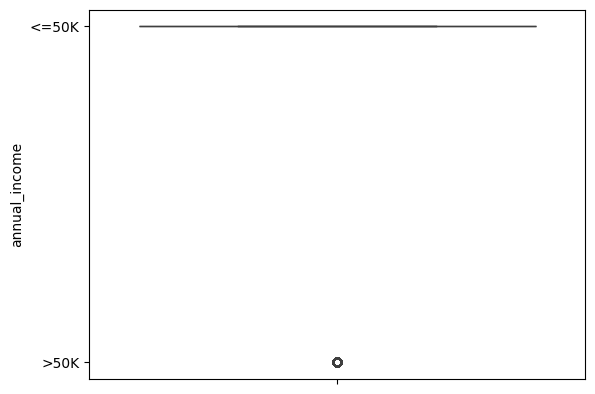

In [13]:
# outlier analysis:-
for col in df.columns:
  if df[col].dtype!='onject':
    sns.boxplot(df[col])
    plt.show()

In [14]:
# outlier reduction:-
out_list=['age','education-num','fnlwgt','hours-per-week']
for col in out_list:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]


In [15]:
# Label Encoding:-
le=LabelEncoder()
for col in df.columns:
  if df[col].dtypes=='object':
    df[col]=le.fit_transform(df[col])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21926 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             21926 non-null  int64
 1   workclass       21926 non-null  int64
 2   fnlwgt          21926 non-null  int64
 3   education       21926 non-null  int64
 4   education-num   21926 non-null  int64
 5   marital-status  21926 non-null  int64
 6   occupation      21926 non-null  int64
 7   relationship    21926 non-null  int64
 8   race            21926 non-null  int64
 9   sex             21926 non-null  int64
 10  capital-gain    21926 non-null  int64
 11  capital-loss    21926 non-null  int64
 12  hours-per-week  21926 non-null  int64
 13  native-country  21926 non-null  int64
 14  annual_income   21926 non-null  int64
dtypes: int64(15)
memory usage: 2.7 MB


# **ML PROCESSES:-**

In [17]:
x=df.drop(columns='annual_income')
y=df['annual_income']

In [18]:
y.value_counts()

,count
annual_income,
0,16147
1,5779


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

# **MODEL BUILDING:-**

# LOGISTIC REGRESSION:-

In [20]:
model1=LogisticRegression()

In [21]:
model1.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred=model1.predict(x_test)

In [23]:
roc_auc_score(y_test,y_pred)*100

np.float64(62.75450737570569)

# DECISION TREE:-

In [24]:
model2=DecisionTreeClassifier()

In [25]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=model2.predict(x_test)

In [27]:
roc_auc_score(y_test,y_pred)*100

np.float64(75.04735020943363)

# RANDOM FOREST WITH GRID SEARCH CV:-

In [29]:
model=RandomForestClassifier(random_state=42)

In [30]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid={
    'n_estimators':[50,75,100],
    'max_depth':[2,6,8],
    'min_samples_split':[2,6,8],
    'min_samples_leaf':[2,6,8],
    'criterion':['gini','entropy']
}


In [38]:
search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='roc_auc')

In [39]:
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 8], 'min_samples_leaf': [2, 6, 8],
                         'min_samples_split': [2, 6, 8],
                         'n_estimators': [50, 75, 100]},
             scoring='roc_auc')

In [41]:
print(search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [61]:
model3=RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_split=2,min_samples_leaf=2,criterion='gini',random_state=69)

In [62]:
model3.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, random_state=69)

In [63]:
y_pred=model3.predict(x_test)

In [64]:
roc_auc_score(y_test,y_pred)*100

np.float64(74.53514842469495)